In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

import catboost as catt
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_rows = 100
pd.options.display.max_rows = 100

**AirQo African Air Quality Prediction Challenge**
1. Understanding the problem/challenge, objective, metric
2. Loading and Inspecting the data
3. EDA
4. Feature Engineering
5. Cross validation
6. Training and evaluation
7. Inference
 Resources
8. https://zindi.africa/competitions/layerai-air-quality-prediction-challenge/discussions/13525


In [8]:
# Importing and loading dataset
train = pd.read_csv("/kaggle/input/airquality/Train (3).csv") # Loading the training dataset
test = pd.read_csv("/kaggle/input/airquality/Test (3).csv") # Loading the testing dataset

In [9]:
# Exploring our train & test datasets
display("train dataset", train.head(),
        "train shape", train.shape,
        "test dataset", test.head(),
        "test shape", test.shape)
        


'train dataset'

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,id_vjcx08sz91,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-10-25,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052301,828817.9375,-100.805145,21.720518,-123.523796,33.745914,0.122055,2.301404,0.285803,230.693756,0.906039,-100.805145,21.720518,-123.523796,33.745914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,id_bkg215syli,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-02,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0.045475,3771.027210,3399.756845,828569.623806,69.245351,59.159695,-143.370575,26.566997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000214,1.462390,0.000240,0.359150,26.525513,-143.480164,59.220097,70.875954,-0.315206,828578.6250,70.875954,59.220097,-143.480164,26.525513,0.116975,3.049902,0.362203,228.260193,0.364713,70.875954,59.220097,-143.480164,26.525513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,id_oui2pot3qd,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-03,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.097816,828878.6875,-96.411942,61.045010,-121.307121,41.898113,0.117559,3.248703,0.384168,224.102463,0.754163,-96.411942,61.045010,-121.307121,41.898113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7

'train shape'

(8071, 80)

'test dataset'

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,uvaerosollayerheight_aerosol_height,uvaerosollayerheight_aerosol_pressure,uvaerosollayerheight_aerosol_optical_depth,uvaerosollayerheight_sensor_zenith_angle,uvaerosollayerheight_sensor_azimuth_angle,uvaerosollayerheight_solar_azimuth_angle,uvaerosollayerheight_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle
0,id_ihxgrbq8bw,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,2023-09-06,13,-0.000072,0.762543,-0.000055,0.079645,-100.330299,26.926420,-86.879776,25.512329,-0.000028,9.0,0.043537,2825.323242,1.000000,829406.9375,-97.787621,26.897718,-86.884308,25.509418,0.000055,0.000016,0.000040,0.000109,9582.745678,-0.258421,0.019749,829420.312500,-100.330299,26.926420,-86.879776,25.512329,0.000243,1.112240,0.000213,0.079645,25.512329,-86.879776,26.926420,-100.330299,-0.258422,829420.312500,-100.330299,26.926420,-86.879776,25.512329,0.126056,2.243713,0.286278,230.244171,0.079324,-100.330299,26.926420,-86.879776,25.512329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043065,74217.403083,2710.544562,83569.504246,1710.544483,3.063105,0.263193,-100.317077,27.059646,-86.885670,25.530511
1,id_dg6s4fhiwe,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,2023-09-07,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.036341,2604.788330,1584.809692,829328.6250,70.753090,11.428769,-87.764297,20.935318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.408162,829340.750000,76.400116,11.171532,-87.726566,20.951560,0.126282,2.136400,0.273757,230.184377,0.613266,76.400116,11.171532,-87.726566,20.951560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id_f7hwwtmuzp,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,2023-09-08,13,-0.000051,1.004265,-0.000051,0.163160,73.117264,43.112466,-89.089083,16.417355,-0.000023,9.0,0.037453,3046.3140

'test shape'

(2783, 79)

In [10]:
categorical_cols, numerical_cols, target_column, id_column = datasetInfo(data=train, id_column="id", target_column="pm2_5")
# Print the values to inspect them
print("ID Column:", id_column)
print("Target Column:", target_column)

Dataset Overview
----------------
Shape: (8071, 80)

Column Names
------------
['id', 'site_id', 'site_latitude', 'site_longitude', 'city', 'country', 'date', 'hour', 'sulphurdioxide_so2_column_number_density', 'sulphurdioxide_so2_column_number_density_amf', 'sulphurdioxide_so2_slant_column_number_density', 'sulphurdioxide_cloud_fraction', 'sulphurdioxide_sensor_azimuth_angle', 'sulphurdioxide_sensor_zenith_angle', 'sulphurdioxide_solar_azimuth_angle', 'sulphurdioxide_solar_zenith_angle', 'sulphurdioxide_so2_column_number_density_15km', 'month', 'carbonmonoxide_co_column_number_density', 'carbonmonoxide_h2o_column_number_density', 'carbonmonoxide_cloud_height', 'carbonmonoxide_sensor_altitude', 'carbonmonoxide_sensor_azimuth_angle', 'carbonmonoxide_sensor_zenith_angle', 'carbonmonoxide_solar_azimuth_angle', 'carbonmonoxide_solar_zenith_angle', 'nitrogendioxide_no2_column_number_density', 'nitrogendioxide_tropospheric_no2_column_number_density', 'nitrogendioxide_stratospheric_no2_column

,count,mean,std,min,25%,50%,75%,max
cloud_cloud_base_pressure,4994.000000,58478.947647,18974.281900,10752.090499,43231.418685,60432.792969,74276.492371,100909.219778
cloud_cloud_top_pressure,4994.000000,51850.474269,17362.316189,8969.158911,38086.093750,53805.308594,66142.430494,95591.601562
uvaerosollayerheight_aerosol_pressure,427.000000,78611.503814,10251.833177,46304.670527,72544.473662,82264.359375,86946.565901,95251.986948
cloud_cloud_top_height,4994.000000,6089.449805,2991.879500,521.378113,3687.102253,5389.787844,8047.738159,17287.677734
cloud_cloud_base_height,4994.000000,5105.978072,2971.949265,9.741494,2701.118575,4389.787844,7047.738159,16287.677734
carbonmonoxide_cloud_height,4441.000000,2041.463881,1366.855440,1.000000,955.937744,1916.541260,3100.837546,4998.942871
uvaerosollayerheight_aerosol_height,427.000000,2217.913597,1149.835481,509.053192,1310.637328,1776.253784,2807.525180,6179.449061
nitrogendioxide_tropopause_pressure,3104.000000,8836.367723,989.373637,7311.868534,8613.719884,8613.739543,9580.202885,11206.381920
carbonmonoxide_h2o_column_number_density,4441.000000,2200.218221,916.002776,652.375097,1616.634031,2068.565907,2538.116630,11400.226679
uvaerosolindex_sensor_altitude,8066.000000,829596.648655,358.074613,828534.875000,829350.212714,829630.500000,829840.937500,830998.562500



ID Column: id
Target Column: pm2_5


In [11]:
# Separating column 'date' from categorical cols

date_cols = ['date'] # Creating a new list containing a single string element
categorical_cols.remove('date') # Removing date column from the categorical list
print(date_cols) # Checking the contents of the date_cols
print(categorical_cols) # Checking new updated list

['date']
['site_id', 'city', 'country']


In [12]:
#  Describing data and difference between train and test datasets
findDifferentialInfo(train, test, __featToExcl=[target_column, id_column]+numerical_cols)

100%|██████████| 4/4 [00:00<00:00, 89.22it/s]


,Feature,Unique values (train),Unique values in test not in train (and %),Unique values in train not in test (and %),NaN in train (and %),NaN in test (and %),% in the biggest cat. (train),dtype
0,site_id,69,39 (100.0%),69 (100.0%),0 (0.0%),0 (0.0%),3.6,object
1,city,4,4 (100.0%),4 (100.0%),0 (0.0%),0 (0.0%),69.3,object
2,country,4,2 (50.0%),2 (50.0%),0 (0.0%),0 (0.0%),69.3,object
3,date,325,2 (1.0%),133 (40.9%),0 (0.0%),0 (0.0%),0.7,object


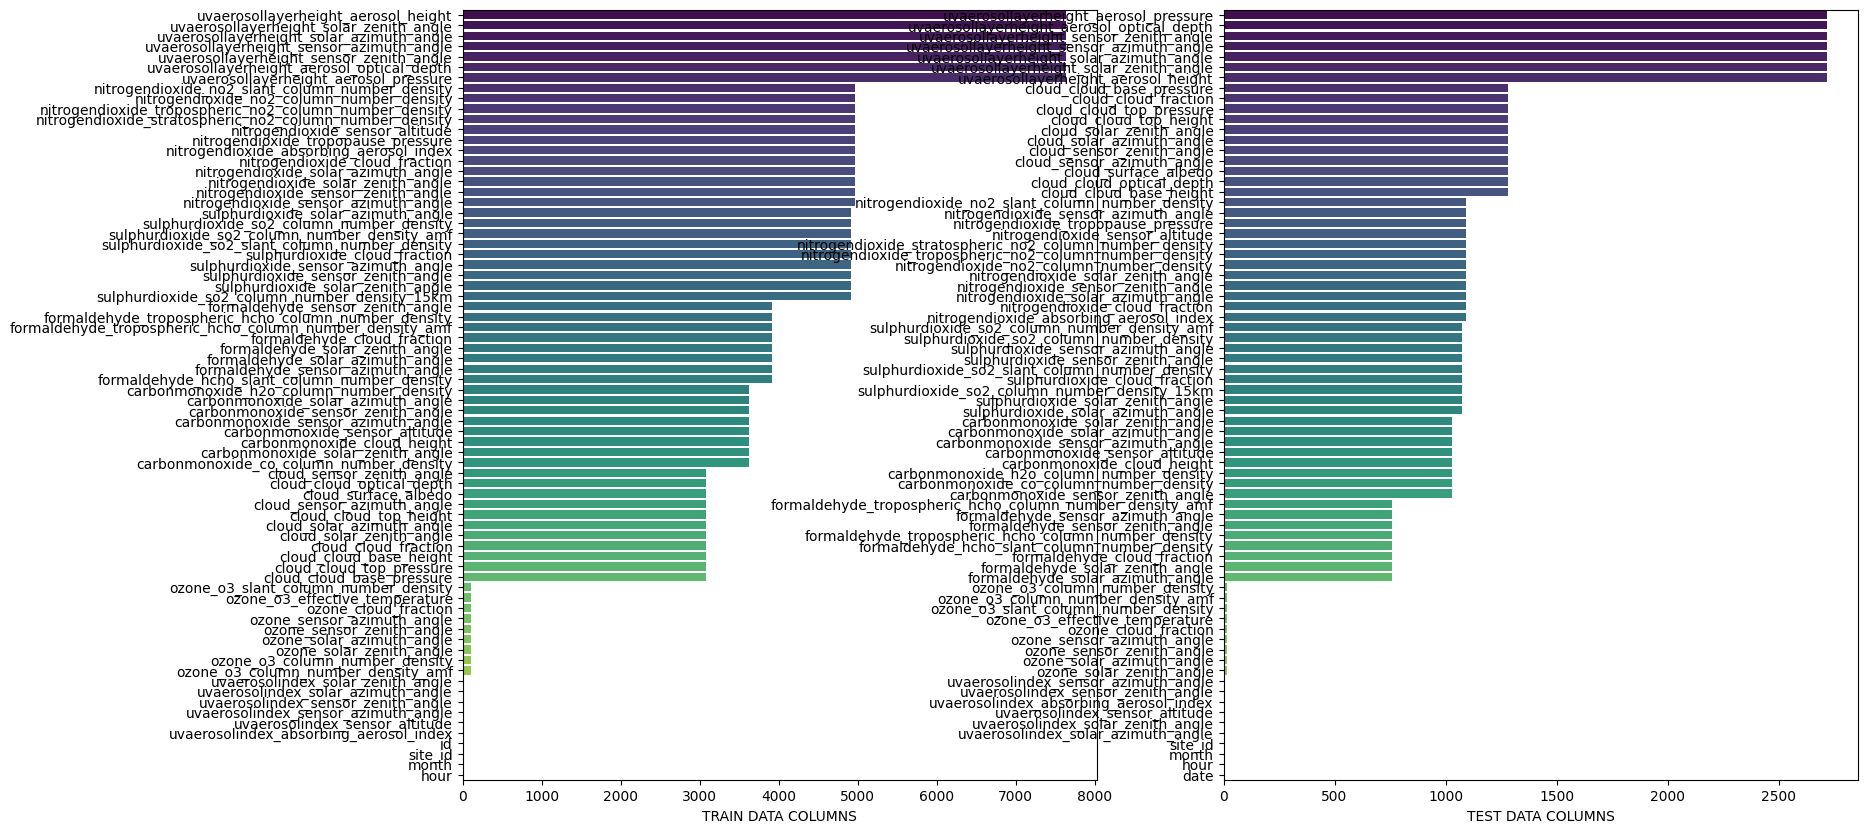

In [13]:
# Comparing missing values between the train and test dataset by Visualizing
columnWiseNullDistributionComparison(train, test)

# Analysis
1. There is a consistent pattern in missing values for both the train and test datasets
2. Consistency in missing data patterns between training and test datasets contributes to the reliability, generalizability, and robustness of machine learning models, ultimately leading to more accurate predictions and better decision-making.

In [14]:
# Structure and contents of the 'site_id' column, which provide insights into the dataset's characteristics and help in data exploration and analysis.
train['site_id'].head()

0    6531a46a89b3300013914a36
1    6531a46a89b3300013914a36
2    6531a46a89b3300013914a36
3    6531a46a89b3300013914a36
4    6531a46a89b3300013914a36
Name: site_id, dtype: object

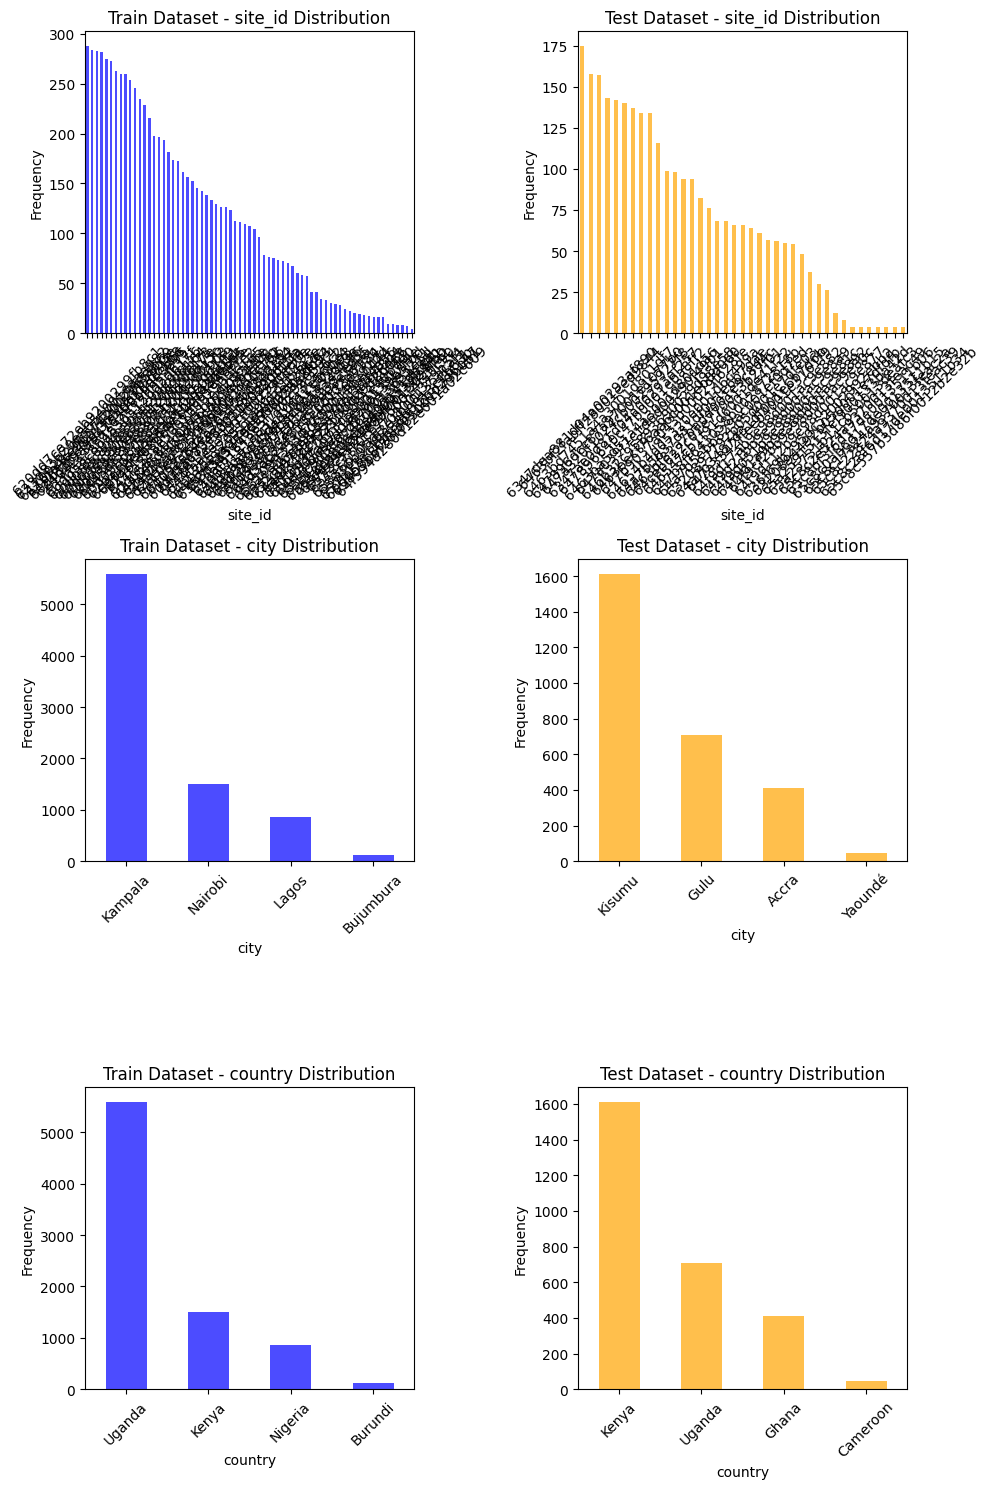

In [15]:
# Plotting the distribution of each categorical columns in both the train and test datasets side by side.

plotCategoricalDistributionSideBySide(train, categorical_columns=categorical_cols, test_dataframe=test)

# Analysis
1. There is similarities in the distribution of categorical variables between the training and test datasets.
2. This is important for model generalizability and robustness which is the ability of a machine learning model to perform well on unseen or new data that it hasn't been trained on

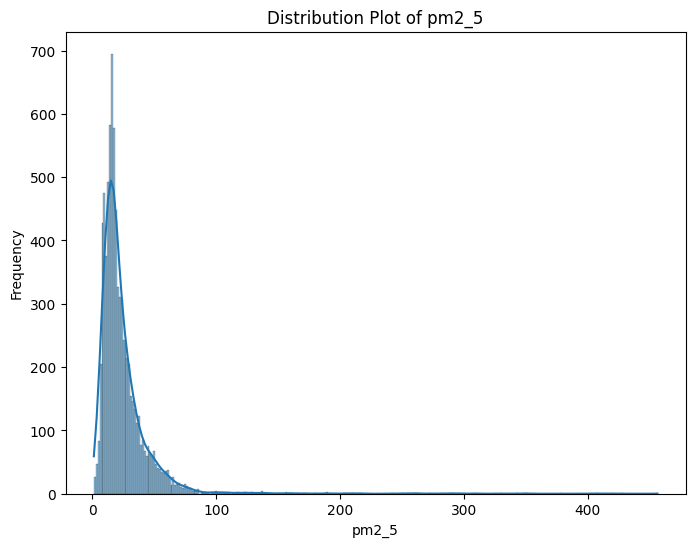

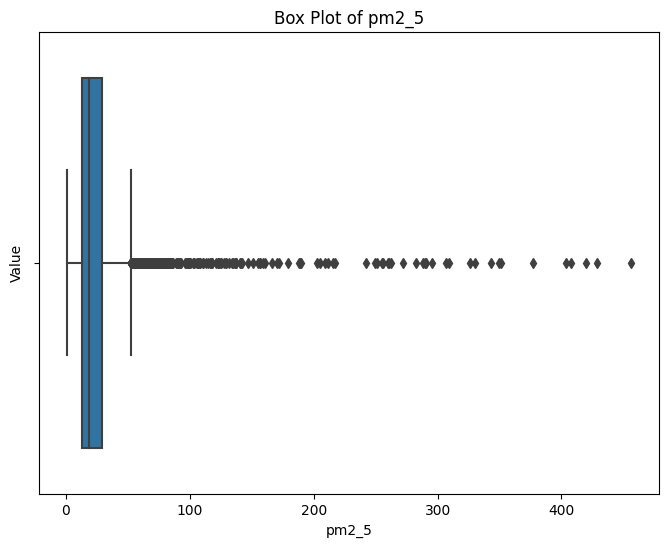

In [16]:
# Analysing the distriburion of our target variable
plot_target(train, target_column, objective="regression")

In [17]:
# Determining the range of dates in train and test to gain insight in the time period covered by the data
train.date.max(),  train.date.min()

('2024-02-26', '2023-01-01')

In [18]:
test.date.max(),  test.date.min()

('2024-02-24', '2023-05-01')

# Complex Time Series EDA
1. Seasonality
2. The trend across different months, years, weeks

In [19]:
# Converting the 'date' column to datetime format to help in data analysis and is essential for working effectively with date and time data in Python.

train['date'] = pd.to_datetime(train['date'])

In [20]:
# Extracting different components (such as month, year, quarter, day, and week) from the 'date' column in the train DataFrame.

train['month'] = train['date'].dt.month  # Extracting month component from the date for analysing monthly trends
train['year'] = train['date'].dt.year  # Extracting year component from the date for analysing yearly trends
train['quarter'] = train['date'].dt.quarter  # Extracting the quarter  component from the date for analysing quarterly pattens
train['day'] = train['date'].dt.day  # Extracting day component from the date for analysing daily patterns or  behaviour
train['week'] = train['date'].dt.isocalendar().week  # Extracting week component from the date for analysing weekly or making comparison across weeks
train[['month', 'year', 'quarter', 'day', 'week']].head()  # Displaying preview of the newly created columns

,month,year,quarter,day,week
0,10,2023,4,25,43
1,11,2023,4,2,44
2,11,2023,4,3,44
3,11,2023,4,8,45
4,11,2023,4,9,45


# Exploring  the trends

***Trends in each month grouped by year***

<Axes: xlabel='year', ylabel='pm2_5'>

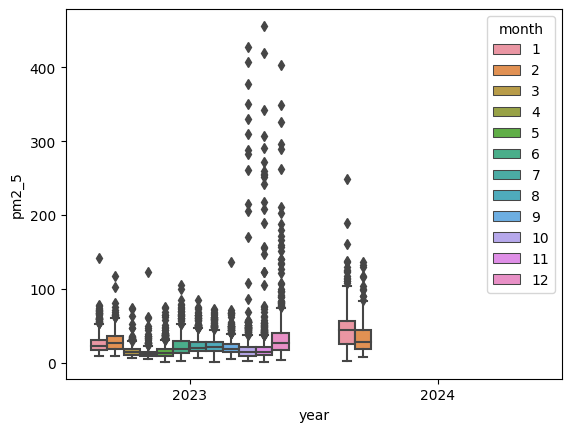

In [21]:
#  Distribution of "pm2_5" across different months in a year
sns.boxplot(hue = 'month',y = target_column, data = train, x = 'year')

<Axes: xlabel='year,month'>

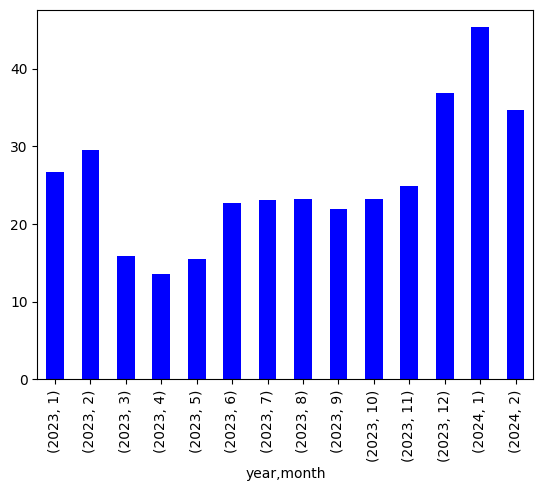

In [22]:
# Visualizing how the mean values of the target variable vary across different months and years.

train.groupby(['year','month'])[target_column].mean().plot(kind='bar', color = 'blue')

<Axes: xlabel='month', ylabel='pm2_5'>

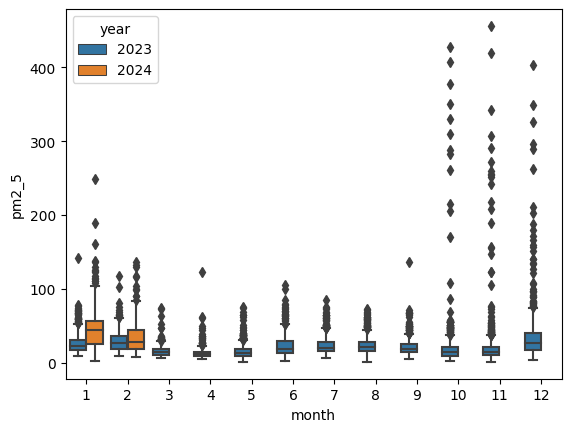

In [23]:
# Distribution of the target variable across different months and how it varies across different years within each month.
sns.boxplot(x = 'month', y=target_column, data = train, hue = "year")

***Observations***
* There is significant rise in pm2_ levels in months 10-12 unlike the first months


<Axes: xlabel='month'>

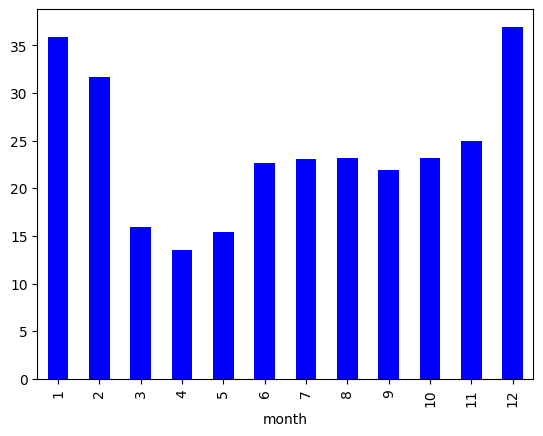

In [24]:
# Visualizing how the mean values of the target variable vary across different months.
train.groupby('month')[target_column].mean().plot(kind='bar', color = 'blue')

***Observations***
* High pm2_5 levels are observed in the beginning and the end of the year as December is close to January hence almost the sam levels of pm2_5 levels

<Axes: xlabel='month'>

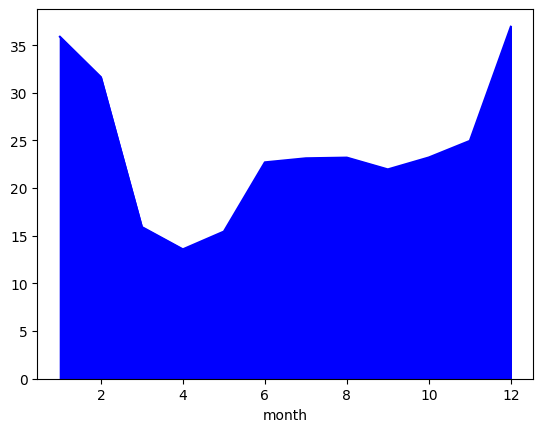

In [25]:
# Understanding the overall trend and variability of the target variable across different months.
train.groupby('month')[target_column].mean().plot(kind = 'area', color ='blue')

***Observations***
* There is high pm2_5 levels in the last months and the first months  of the year

# Comparing weekly "pm2_5 levels"

<Axes: xlabel='week'>

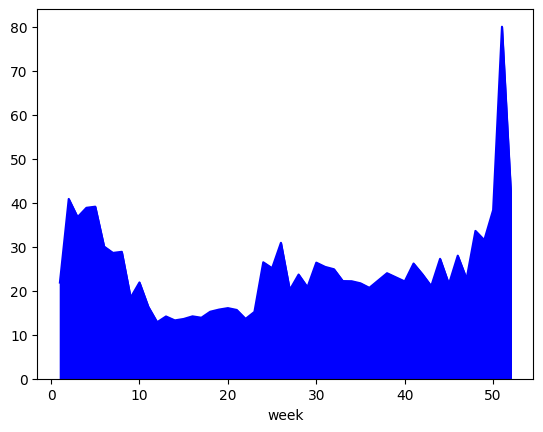

In [26]:
# Visualizing the overall trend and variability of the target variable across different weeks.
train.groupby('week')[target_column].mean().plot(kind = 'area', color ='blue')

***Observation***
* High pm2_5 levels are observed in the last weeks of the year

<Axes: xlabel='week,year'>

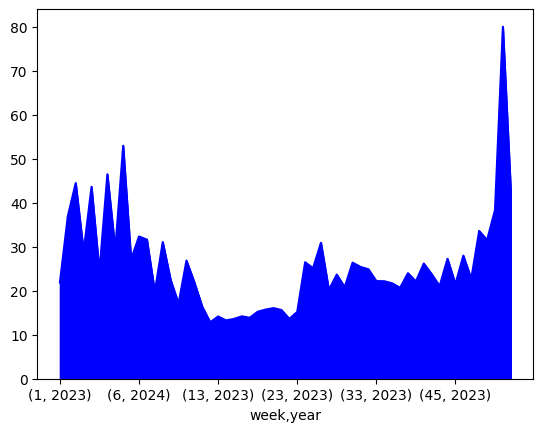

In [27]:
# Overall trend and variability of the target variable across different weeks and years.
train.groupby(['week', 'year'])[target_column].mean().plot(kind = 'area', color ='blue')

# Comparing yearly "pm2_5" levels in each city in the train set

<Axes: xlabel='year', ylabel='pm2_5'>

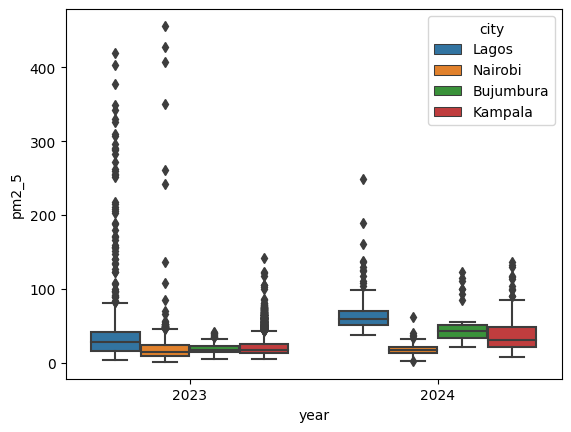

In [28]:
sns.boxplot(hue = 'city', y=target_column, data = train, x = "year")

***Observations***
* Nairobi averagely had the highest pm2_5 levels in the year 2023 while Kigali had the lowest
* Lagos averagely had the highest pm2_5 levels in the first 2 months of 2024


# Modelling
1. Good cross validation: GroupKFold
2. Drop all columns with more than 60% missing values
3. Fill missing values using time series related techniques
4. Drop country since they the same properties as the cities
5. Drop highly correlated features greater than 0.9
6. Cyclic features
7. Datetime features

In [29]:
# Defining a configuration class named Config that holds important information such as file paths and column names related to air quality data. 
# This class allows for easy access to these configuration parameters throughout the codebase by accessing the attributes of the Config class.
class Config:
    path = "/kaggle/input/airquality" # Represents the path to the directory where air quality data is stored.
    id_col = "id"  # This indicates the name of the column in the dataset that serves as the unique identifier for each record
    target_col = "pm2_5" # This indicates the name of the column in the dataset that represents the target variable

In [30]:
# Removing missing values

def remove_nans(data, thresh):
    # Define a nested function to calculate the proportion of NaN values in a column
    def nan_rates(data, col):
        return data[col].isna().sum() / data.shape[0]
    # Iterate over columns in the DataFrame
    for col in data.columns:
        # Check if the proportion of NaN values in the column exceeds the specified threshold
        if nan_rates(data, col) >= thresh:
            # If so, drop the column from the DataFrame
            data.drop(col, axis=1, inplace=True)
        
    # Return the modified DataFrame
    return data

# Remove columns with NaN values exceeding 70% from the 'train' and 'test' datasets
train = remove_nans(train, 0.7)
test = remove_nans(test, 0.7)

# Print the shapes of the modified 'train' and 'test' datasets
train.shape, test.shape

((8071, 77), (2783, 72))

# Setting up Cross Valdation
1. GroupKFold

In [31]:
# Create folds before feature engineering
gkf = GroupKFold(n_splits = 4)
train['folds'] = np.nan

# Generate the splits
for fold, (train_index, test_index) in enumerate(gkf.split(train, groups=train['city']), 1):
    # Assign fold index to corresponding rows in the DataFrame
    train.loc[test_index, 'folds'] = fold

# Convert fold indices to integer type
train['folds'] = train['folds'].astype(int)
train.groupby('folds')['pm2_5'].agg({'count'})

,count
folds,
1,5596
2,1500
3,852
4,123


In [32]:
train[(train['date']=='2023-10-25') & (train['city']=='Kampala')]

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,sulphurdioxide_solar_zenith_angle,sulphurdioxide_so2_column_number_density_15km,month,carbonmonoxide_co_column_number_density,carbonmonoxide_h2o_column_number_density,carbonmonoxide_cloud_height,carbonmonoxide_sensor_altitude,carbonmonoxide_sensor_azimuth_angle,carbonmonoxide_sensor_zenith_angle,carbonmonoxide_solar_azimuth_angle,carbonmonoxide_solar_zenith_angle,nitrogendioxide_no2_column_number_density,nitrogendioxide_tropospheric_no2_column_number_density,nitrogendioxide_stratospheric_no2_column_number_density,nitrogendioxide_no2_slant_column_number_density,nitrogendioxide_tropopause_pressure,nitrogendioxide_absorbing_aerosol_index,nitrogendioxide_cloud_fraction,nitrogendioxide_sensor_altitude,nitrogendioxide_sensor_azimuth_angle,nitrogendioxide_sensor_zenith_angle,nitrogendioxide_solar_azimuth_angle,nitrogendioxide_solar_zenith_angle,formaldehyde_tropospheric_hcho_column_number_density,formaldehyde_tropospheric_hcho_column_number_density_amf,formaldehyde_hcho_slant_column_number_density,formaldehyde_cloud_fraction,formaldehyde_solar_zenith_angle,formaldehyde_solar_azimuth_angle,formaldehyde_sensor_zenith_angle,formaldehyde_sensor_azimuth_angle,uvaerosolindex_absorbing_aerosol_index,uvaerosolindex_sensor_altitude,uvaerosolindex_sensor_azimuth_angle,uvaerosolindex_sensor_zenith_angle,uvaerosolindex_solar_azimuth_angle,uvaerosolindex_solar_zenith_angle,ozone_o3_column_number_density,ozone_o3_column_number_density_amf,ozone_o3_slant_column_number_density,ozone_o3_effective_temperature,ozone_cloud_fraction,ozone_sensor_azimuth_angle,ozone_sensor_zenith_angle,ozone_solar_azimuth_angle,ozone_solar_zenith_angle,cloud_cloud_fraction,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5,year,quarter,day,week,folds
421,id_bnzz82vs1f,60d058c8048305120d2d6156,0.351700,32.591000,Kampala,Uganda,2023-10-25,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0.031926,2802.691297,2855.287246,829493.977286,-97.656868,38.128307,-112.761810,33.791027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.253758,829523.375001,-99.638533,37.993793,-112.731959,33.763017,0.117948,2.453233,0.293482,234.344616,0.519771,-99.638533,37.993793,-112.731959,33.763017,0.513754,31886.857048,9415.787831,36683.276504,8415.787831,4.991480,0.307167,-99.635167,38.030097,-112.729436,33.768916,10.72830,2023,4,25,43,1
568,id_hsain920tf,60d058c8048305120d2d615a,0.218200,32.617600,Kampala,Uganda,2023-10-25,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0.033298,4196.022150,3805.030004,829517.098481,-97.670325,38.128513,-112.535338,33.753524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000389,0.701304,0.000213,0.301823,33.712009,-112.521233,37.900803,-99.659981,-0.460488,829545.312500,-99.659981,37.900803,-112.521233,33.712009,0.118144,2.449934,0.293393,229.739777,0.304247,-99.659981,37.900803,-112.521233,33.712009,0.303319,43368.523437,6987.647461,49297.640625,5987.647461,8.670818,0.184457,-99.659988,37.900917,-112.521225,33.712029,16.58720,2023,4,25,43,1
825,id_hse0aqv6dj,616fe4ce9657420029658b3e,0.405320,32.620270,Kampala,Uganda,2023-10-25,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0.031926,2802.691162,2855.287109,829493.937500,-97.656868,38.128307,-112.761810,33.791027,0.000047,0.000011,0.000036,0.000101,8613.731747,0.097367,0.171169,829516.125000,-99.614639,38.204243,-112.789459,33.809284,0.000192,1.469346,0.000223,0.303332,33.809284,-112.789459,38.204243,-99.614639,0.097379,829516.125000,-99.614639,38.204243,-112.789459,3

# Feature engineering

In [33]:
def feature_engineering(train,test):
    le = LabelEncoder()
    data = pd.concat([train, test])
    data = data.sort_values(by = ['city', 'date', 'hour'])
    categorical_cols = data.select_dtypes(include='object').columns.tolist()
    high_cardinality = ['site_id']
    low_cardinality = ['city', 'country']
    categorical_cols.remove('date')
    date_cols = ['date']
    numerical_cols = data.select_dtypes(exclude='object').columns.tolist()
    data['location'] = data['site_latitude'].astype('str') + '_' + data['site_longitude'].astype('str')
    
    #fill in missing values BY grouping using the cities 
    nan_cols = [col for col in numerical_cols if data[col].isnull().sum()>0 and col not in [Config.target_col, "folds"]]
    for col in nan_cols:
        data[col].fillna(data[["location", col]].groupby(["location"]).shift(periods=1).fillna(method='ffill', limit=1).fillna(method='bfill', limit=1)[col], inplace=True) 

    #getting date features
    for col in date_cols:
        data[col] = pd.to_datetime(data[col])
        data['month'] = data['date'].dt.month
        data['year'] = data['date'].dt.year
        data['quarter'] = data['date'].dt.quarter
        data['day'] = data['date'].dt.day
        data['week'] = data['date'].dt.isocalendar().week
        
    
    #label encoding the categorical features
    for col in high_cardinality + date_cols + ['location']:
        data[col] = le.fit_transform(data[col])
        
    

    
    
#     data = pd.get_dummies(data , columns = low_cardinality, drop_first= True, dtype=float)
    independent_features = [col for col in data.columns if col not in [Config.target_col, Config.id_col, 'folds', 'country', 'city','site_id','site_latitude','site_longitude' ]]
    dependent_feature = Config.target_col
    
    train  = data[data['id'].isin(train['id'].unique())]
    test = data[data['id'].isin(test['id'].unique())]
    
    return train, test, independent_features, dependent_feature
    
train_df, test_df, independent_features, dependent_feature = feature_engineering(train, test)

# Modelling  stage 1

In [38]:
# Filtering the rows in train_df DataFrame where the 'folds' column contains values 1.0, 3.0, or 4.0
# This creates a subset of the original DataFrame for training data
training = train_df[train_df['folds'].isin([1.0, 3.0, 4.0])]

# Filtering the rows in train_df DataFrame where the 'folds' column contains value 2.0
# This creates a subset of the original DataFrame for validation data
validation = train_df[train_df['folds'].isin([2.0])]

# This shows the number of rows and columns in each DataFrame
# The shape is represented as (number of rows, number of columns)
# The first element represents the number of rows and the second element represents the number of columns
training.shape, validation.shape


((6571, 79), (1500, 79))

In [39]:
model = catt.CatBoostRegressor(random_state=42, eval_metric = 'RMSE')
model.fit(training[independent_features], training[dependent_feature], eval_set = (validation[independent_features], validation[dependent_feature]), verbose=100, early_stopping_rounds=250)

Learning rate set to 0.068433
0:	learn: 24.2952653	test: 25.8751751	best: 25.8751751 (0)	total: 78.5ms	remaining: 1m 18s
100:	learn: 12.6578166	test: 25.0294685	best: 25.0284275 (96)	total: 1.26s	remaining: 11.2s
200:	learn: 9.6718061	test: 25.0435678	best: 24.9941975 (141)	total: 2.59s	remaining: 10.3s
300:	learn: 8.3879136	test: 25.1408594	best: 24.9941975 (141)	total: 3.58s	remaining: 8.32s
Stopped by overfitting detector  (250 iterations wait)

bestTest = 24.99419754
bestIteration = 141

Shrink model to first 142 iterations.


# Visualizing feature importance

In [40]:
def get_catt_varimp(model, train_columns, max_vars=350):
    """
    Function to create a variable importance DataFrame.
    
    Parameters:
    - model: Fitted scikit-learn API LGBMClassifier or LGBMRegressor model
    - train_columns: List of feature names used in training the model
    - max_vars: Maximum number of top variables to include in the DataFrame (default is 350)
    
    Returns:
    - DataFrame containing variable importance values for each feature
    
    This function calculates the variable importance based on the fitted model's feature_importances_ property,
    sorts the importance values, and returns a DataFrame with the top 'max_vars' variables.
    """

    # Calculate the percentage of importance for each feature
    feature_importances_perc = (model.feature_importances_ / sum(model.feature_importances_)) * 100
    
    # Create a DataFrame with feature names and their corresponding importance percentages
    cv_varimp_df = pd.DataFrame([train_columns, feature_importances_perc]).T
    cv_varimp_df.columns = ['feature_name', 'varimp (%)']
    
    # Sort the DataFrame by variable importance in descending order
    cv_varimp_df.sort_values(by='varimp (%)', ascending=False, inplace=True)
    
    # Select the top 'max_vars' variables
    cv_varimp_df = cv_varimp_df.iloc[0:max_vars]   
    
    return cv_varimp_df

# Call the function with the fitted model and list of independent features
# This will generate a DataFrame containing variable importance values for each feature
get_catt_varimp(model, independent_features)


,feature_name,varimp (%)
70,location,60.547511
12,carbonmonoxide_co_column_number_density,7.895957
0,date,4.153278
50,ozone_cloud_fraction,2.266267
69,week,1.845948
44,uvaerosolindex_solar_azimuth_angle,1.693425
11,month,1.562635
53,ozone_solar_azimuth_angle,1.068727
18,carbonmonoxide_solar_azimuth_angle,0.995628
21,nitrogendioxide_tropospheric_no2_column_number...,0.983887


In [42]:
# Calculating the percentage of importance for each feature relative to the sum of all importances
feature_importances_perc = (model.feature_importances_ / sum(model.feature_importances_)) * 100

# Creating a DataFrame containing the independent features and their corresponding importance percentages
cv_varimp_df = pd.DataFrame([independent_features, feature_importances_perc]).T

# Select only the features with non-zero importance values
non_zero_features = cv_varimp_df[cv_varimp_df[1] > 0][0].values

# Return the names of features with non-zero importance values
non_zero_features


array(['date', 'hour', 'sulphurdioxide_so2_column_number_density',
       'sulphurdioxide_so2_column_number_density_amf',
       'sulphurdioxide_so2_slant_column_number_density',
       'sulphurdioxide_cloud_fraction',
       'sulphurdioxide_sensor_azimuth_angle',
       'sulphurdioxide_sensor_zenith_angle',
       'sulphurdioxide_solar_azimuth_angle',
       'sulphurdioxide_solar_zenith_angle',
       'sulphurdioxide_so2_column_number_density_15km', 'month',
       'carbonmonoxide_co_column_number_density',
       'carbonmonoxide_h2o_column_number_density',
       'carbonmonoxide_cloud_height', 'carbonmonoxide_sensor_altitude',
       'carbonmonoxide_sensor_azimuth_angle',
       'carbonmonoxide_sensor_zenith_angle',
       'carbonmonoxide_solar_azimuth_angle',
       'carbonmonoxide_solar_zenith_angle',
       'nitrogendioxide_no2_column_number_density',
       'nitrogendioxide_tropospheric_no2_column_number_density',
       'nitrogendioxide_stratospheric_no2_column_number_density',


In [43]:
# The length of 'non_zero_features' provides insight into the number of significant features
# influencing the model's performance.
len(non_zero_features)

70

# Dropping all highly correlated features

In [44]:
# Computing the correlation matrix between the features in the training dataset
# based on the subset of features with non-zero importance values.
corr = training[non_zero_features].corr()

# Creating a boolean array 'columns' initialized with True values,
# where each element represents whether the corresponding feature should be included.
columns = np.full((corr.shape[0],), True, dtype=bool)

# Iterating over the upper triangle of the correlation matrix to identify highly correlated features.
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        # Checking if the correlation between feature i and feature j is greater than or equal to 0.9
        if corr.iloc[i, j] >= 0.9:
            # If the correlation is above the threshold and the feature j has not been marked as False,
            # mark feature j as False to indicate it should be excluded.
            if columns[j]:
                columns[j] = False

# Selecting only the columns (features) that are not highly correlated based on the boolean array 'columns'.
selected_columns = training[non_zero_features].columns[columns]

# Returning the names of the selected features that are not highly correlated.
selected_columns


Index(['date', 'hour', 'sulphurdioxide_so2_column_number_density',
       'sulphurdioxide_so2_column_number_density_amf',
       'sulphurdioxide_cloud_fraction', 'sulphurdioxide_sensor_azimuth_angle',
       'sulphurdioxide_sensor_zenith_angle',
       'sulphurdioxide_solar_azimuth_angle',
       'sulphurdioxide_solar_zenith_angle', 'month',
       'carbonmonoxide_co_column_number_density',
       'carbonmonoxide_h2o_column_number_density',
       'carbonmonoxide_cloud_height', 'carbonmonoxide_sensor_altitude',
       'carbonmonoxide_sensor_azimuth_angle',
       'carbonmonoxide_sensor_zenith_angle',
       'carbonmonoxide_solar_zenith_angle',
       'nitrogendioxide_no2_column_number_density',
       'nitrogendioxide_stratospheric_no2_column_number_density',
       'nitrogendioxide_no2_slant_column_number_density',
       'nitrogendioxide_tropopause_pressure',
       'nitrogendioxide_absorbing_aerosol_index',
       'nitrogendioxide_cloud_fraction',
       'formaldehyde_tropospheric_h

In [45]:
# 'selected_columns' contains the names of these selected features.
# By obtaining the length of 'selected_columns', we determine the count of features 
# that passed the criterion of being not highly correlated.

len(selected_columns)

46

# Robust Cross Validation: GroupKFold

In [46]:
# Initialize empty lists to store predictions for each fold
fold_pred = []
oof_pred = []

# Iterate over each fold for cross-validation
for fold in [1,2,3,4]:
    # Print separator for better visualization
    print("*" * 100)
    
    # Separate training and validation datasets based on the current fold
    training = train_df[train_df['folds'] != fold]
    validation = train_df[train_df['folds'] == fold]
    
    # Split dependent and independent features for training and validation sets
    y_train = training[dependent_feature]
    y_test = validation[dependent_feature]
    
    X_train = training[selected_columns]
    X_test = validation[selected_columns]
    
    # Initialize and train the CatBoostRegressor model
    model = catt.CatBoostRegressor(random_state=42, eval_metric='RMSE')
    model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=100, early_stopping_rounds=250)
    
    # Make predictions on the validation set and calculate RMSE
    preds = model.predict(X_test)
    print(f"RMSE for fold {fold}: {(mean_squared_error(preds, y_test, squared=False))}")
    oof_pred.append(mean_squared_error(preds, y_test, squared=False))
    
    # Make predictions on the test set for this fold and append to fold_pred list
    test_preds = model.predict(test_df[selected_columns])
    fold_pred.append(test_preds)


****************************************************************************************************
Learning rate set to 0.058707
0:	learn: 38.1381341	test: 15.3031777	best: 15.3031777 (0)	total: 10ms	remaining: 9.99s
100:	learn: 21.7189093	test: 13.3715769	best: 13.2657305 (54)	total: 616ms	remaining: 5.48s
200:	learn: 15.9257965	test: 13.7225475	best: 13.2657305 (54)	total: 1.22s	remaining: 4.86s
300:	learn: 12.5205730	test: 14.2315894	best: 13.2657305 (54)	total: 1.81s	remaining: 4.21s
Stopped by overfitting detector  (250 iterations wait)

bestTest = 13.26573055
bestIteration = 54

Shrink model to first 55 iterations.
RMSE for fold 1: 13.265730551877231
****************************************************************************************************
Learning rate set to 0.068433
0:	learn: 24.3148356	test: 25.9114220	best: 25.9114220 (0)	total: 9.8ms	remaining: 9.79s
100:	learn: 13.1313236	test: 25.0173023	best: 24.9749788 (54)	total: 724ms	remaining: 6.44s
200:	learn: 9.9892226

Text(0.5, 1.0, 'CatBoostClassifier features importance (top 50):')

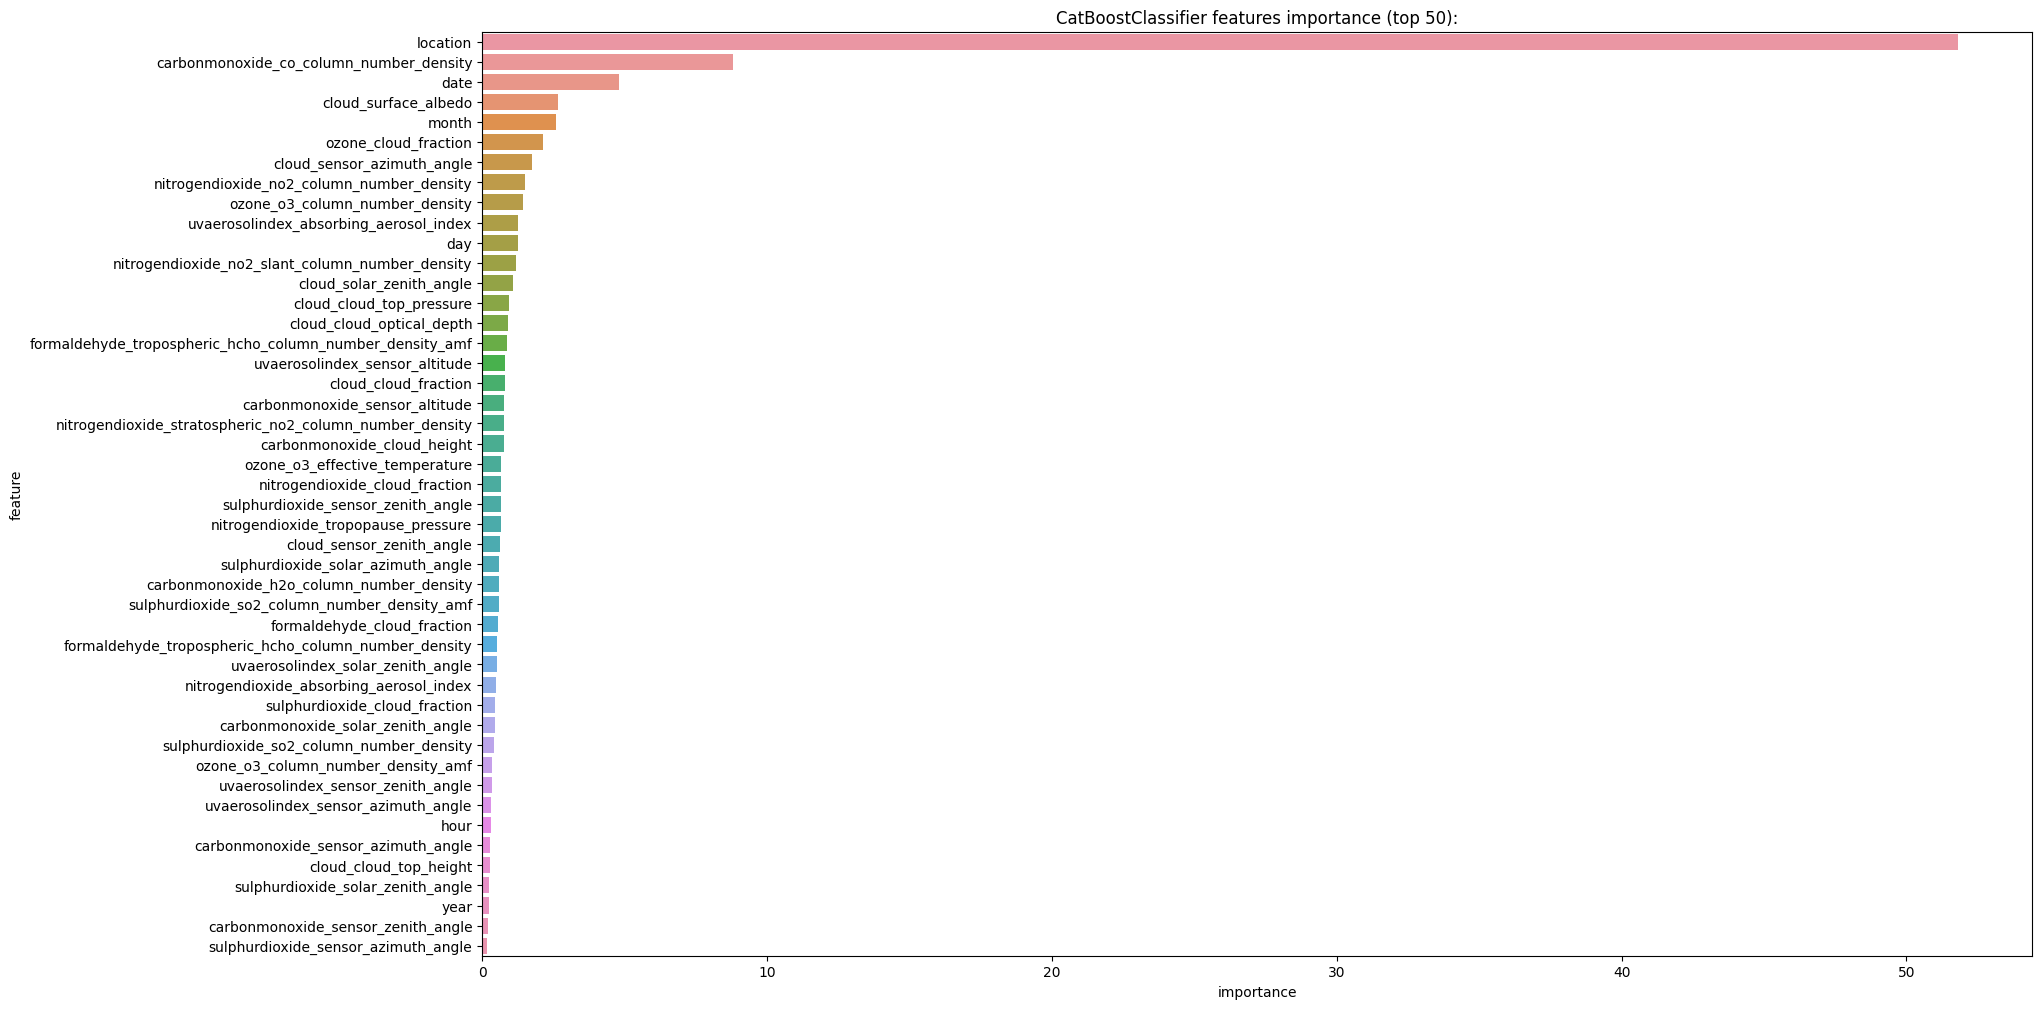

In [47]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store feature importances obtained from the trained CatBoostRegressor model
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
# Assign feature names to the DataFrame
feature_importance_df['feature'] = selected_columns

# Set up the plot figure size
plt.figure(figsize=(20, 12))

# Create a bar plot using seaborn to visualize feature importances
sns.barplot(x="importance", y="feature", 
            data=feature_importance_df.sort_values(by='importance', ascending=False).head(60))

# Set title for the plot
plt.title('CatBoostRegressor features importance (top 50):')



In [48]:
# Calculate the mean prediction across all folds for each observation in the test dataset
pred = np.mean(fold_pred, axis=0)

# Obtain the length of the 'pred' array, which represents the number of predictions made
# This is useful for verifying the consistency of the predictions
len(pred)

# Add the mean predictions as a new column named 'pred' to the test_df DataFrame
test_df['pred'] = pred

# Create a new DataFrame 'sub' containing only the 'id' and 'pred' columns from the test_df DataFrame
sub = test_df[['id', 'pred']]

# Display the first few rows of the sub DataFrame to verify the structure of the final predictions
sub.head()


,id,pred
2597,id_ako3197fah,34.452249
2598,id_nprrbmfek0,30.871474
2599,id_bmxffkemr6,31.465116
2600,id_w7doelm7x4,32.706828
2601,id_8z87l1y49i,24.389337
